#### 1.导包

In [457]:
#导入pandas，并重命名为pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
# 导入pytorch包
import torch
from torch.utils import data
from d2l import torch as d2l
from torch import nn
import seaborn as sns
from sklearn.metrics import mean_absolute_error
# 设置显示中文字体
plt.rcParams["font.sans-serif"] = ["SimHei"]

#### 2.导入数据表

In [458]:
#导入数据表
#导入 covid.test 表
covid_test = pd.read_csv('data/COVID_19/covid.test.csv', sep = ',')
#导入 covid.train 表
covid_train = pd.read_csv('data/COVID_19/covid.train.csv', sep = ',')

#### 4.数据预处理和特征值选取

In [459]:
# 去除id列
covid_train1 = covid_train.drop('id',axis=1)

#### 4.划分数据集

In [460]:
train = covid_train1.drop(['tested_positive.2'], axis=1)
target = covid_train['tested_positive.2']
train

,AL,AK,AZ,AR,CA,CO,CT,FL,GA,ID,...,shop.2,restaurant.2,spent_time.2,large_event.2,public_transit.2,anxious.2,depressed.2,felt_isolated.2,worried_become_ill.2,worried_finances.2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62.434539,23.812411,43.430423,16.151527,1.602635,15.409449,12.088688,16.702086,53.991549,43.604229
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62.024517,23.682974,43.196313,16.123386,1.641863,15.230063,11.809047,16.506973,54.185521,42.665766
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62.116842,23.593983,43.362200,16.159971,1.677523,15.717207,12.355918,16.273294,53.637069,42.972417
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,61.294809,22.576992,42.954574,15.544373,1.578030,15.295650,12.218123,16.045504,52.446223,42.907472
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.664482,22.091433,43.290957,15.214655,1.641667,14.778802,12.417256,16.134238,52.560315,43.321985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.024971,15.090116,30.839219,7.849525,1.760094,14.617563,11.163213,18.742673,68.024690,38.920206
2696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.885129,14.779264,30.617100,7.754800,1.780730,14.513419,11.281241,18.539741,67.855755,39.224244
2697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.056772,14.961085,30.595194,7.744075,1.921828,14.160990,11.163526,18.702564,67.731162,38.740651
2698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.620924,14.609582,30.420998,7.687974,1.992580,14.409427,11.330301,19.134697,67.795100,38.595125


#### 5.特征值选择-1

In [461]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split

In [462]:
bestfeatures = SelectKBest(score_func=f_regression, k=30)
fit = bestfeatures.fit(train,target)
train_scores = pd.DataFrame(fit.scores_)
train_columns = pd.DataFrame(train.columns)
featureScores = pd.concat([train_columns,train_scores],axis=1)
featureScores.columns = ['Specs','Score'] 
# 按照分数排序
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores.describe()

,Score
count,93.000000
mean,3408.476250
std,16933.163528
min,0.012080
25%,11.660815
50%,69.027593
75%,208.122647
max,148069.658278


In [463]:
# 导出数据表
# featureScores.to_excel(r'C:\Users\Administrator\Desktop\featureScores.xlsx')

In [464]:
# 选取前30
bestfeatures = SelectKBest(score_func=f_regression, k=30)
fit = bestfeatures.fit(train,target)
cols = bestfeatures.get_support(indices=True)
cols

array([17, 40, 41, 42, 43, 47, 49, 51, 55, 56, 57, 58, 59, 60, 61, 65, 67,
       69, 73, 74, 75, 76, 77, 78, 79, 83, 85, 87, 91, 92], dtype=int64)

In [465]:
train = train.iloc[:,cols]
# 去除MA列
train1 = train.drop('MA',axis=1)

In [466]:
train1

,cli,ili,hh_cmnty_cli,nohh_cmnty_cli,shop,spent_time,public_transit,worried_become_ill,worried_finances,tested_positive,...,tested_positive.1,cli.2,ili.2,hh_cmnty_cli.2,nohh_cmnty_cli.2,shop.2,spent_time.2,public_transit.2,worried_become_ill.2,worried_finances.2
0,0.814610,0.771356,25.648907,21.242063,63.139094,44.726055,1.716262,53.439316,43.279629,19.586492,...,20.151838,0.897802,0.887893,26.060544,21.503832,62.434539,43.430423,1.602635,53.991549,43.604229
1,0.838995,0.807767,25.679101,21.280270,63.318650,44.385166,1.664819,53.256795,43.622728,20.151838,...,20.704935,0.972842,0.965496,25.754087,21.016210,62.024517,43.196313,1.641863,54.185521,42.665766
2,0.897802,0.887893,26.060544,21.503832,62.434539,43.430423,1.602635,53.991549,43.604229,20.704935,...,21.292911,0.955306,0.963079,25.947015,20.941798,62.116842,43.362200,1.677523,53.637069,42.972417
3,0.972842,0.965496,25.754087,21.016210,62.024517,43.196313,1.641863,54.185521,42.665766,21.292911,...,21.166656,0.947513,0.968764,26.350501,21.109971,61.294809,42.954574,1.578030,52.446223,42.907472
4,0.955306,0.963079,25.947015,20.941798,62.116842,43.362200,1.677523,53.637069,42.972417,21.166656,...,19.896607,0.883833,0.893020,26.480624,21.003982,60.664482,43.290957,1.641667,52.560315,43.321985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,0.655823,0.659976,25.265366,20.468897,50.265694,31.597793,1.768811,68.115748,38.478143,13.869286,...,13.434180,0.586713,0.597559,25.271178,20.770195,50.024971,30.839219,1.760094,68.024690,38.920206
2696,0.598352,0.602552,25.299465,20.756444,50.050349,31.656358,1.789015,67.691795,38.953184,13.434180,...,13.008853,0.576435,0.595312,24.607461,20.176201,49.885129,30.617100,1.780730,67.855755,39.224244
2697,0.586713,0.597559,25.271178,20.770195,50.024971,30.839219,1.760094,68.024690,38.920206,13.008853,...,12.725638,0.562426,0.572969,24.020275,19.654514,50.056772,30.595194,1.921828,67.731162,38.740651
2698,0.576435,0.595312,24.607461,20.176201,49.885129,30.617100,1.780730,67.855755,39.224244,12.725638,...,12.613441,0.600671,0.611160,23.797738,19.519105,49.620924,30.420998,1.992580,67.795100,38.595125


In [467]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# 创建StandardScaler对象
scaler = StandardScaler()
# 对数据进行标准化处理
train1 = scaler.fit_transform(train1)
train1

array([[-0.42115652, -0.57792261, -0.41724228, ..., -0.74371918,
        -1.74350711, -0.18432414],
       [-0.36312659, -0.4919582 , -0.41392139, ..., -0.70646391,
        -1.71231662, -0.36372625],
       [-0.22318412, -0.30277996, -0.37196795, ..., -0.6725974 ,
        -1.80050724, -0.30510505],
       ...,
       [-0.96348806, -0.98825706, -0.45878724, ..., -0.44057832,
         0.46581213, -1.11407397],
       [-0.98794658, -0.9935615 , -0.53178689, ..., -0.37338446,
         0.47609325, -1.14189356],
       [-1.02128406, -1.04631266, -0.59636922, ..., -0.39856624,
         0.55472064, -1.16890632]])

In [468]:
X,y = torch.tensor(train1),torch.tensor(target)
print(X,y,sep='\n')

tensor([[-0.4212, -0.5779, -0.4172,  ..., -0.7437, -1.7435, -0.1843],
        [-0.3631, -0.4920, -0.4139,  ..., -0.7065, -1.7123, -0.3637],
        [-0.2232, -0.3028, -0.3720,  ..., -0.6726, -1.8005, -0.3051],
        ...,
        [-0.9635, -0.9883, -0.4588,  ..., -0.4406,  0.4658, -1.1141],
        [-0.9879, -0.9936, -0.5318,  ..., -0.3734,  0.4761, -1.1419],
        [-1.0213, -1.0463, -0.5964,  ..., -0.3986,  0.5547, -1.1689]],
       dtype=torch.float64)
tensor([20.7049, 21.2929, 21.1667,  ..., 12.6134, 12.4772, 11.8117],
       dtype=torch.float64)


In [469]:
# 切割数据样本 20%验证集；80%训练集
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#检查训练集和验证集中样本的形态
X_train.shape,X_test.shape,y_train.shape,y_test.shape

(torch.Size([2160, 29]),
 torch.Size([540, 29]),
 torch.Size([2160]),
 torch.Size([540]))

In [470]:

X_train = torch.tensor(X_train,dtype=torch.float)
y_train = torch.tensor(y_train,dtype=torch.float32)
X_test = torch.tensor(X_test,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16484\632151407.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train,dtype=torch.float)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16484\632151407.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train,dtype=torch.float32)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16484\632151407.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test,dtype=torch.float32)
C:\Users\Administrator\AppData\L

In [471]:
# 定义多层感知机模型
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)  # 输入层
        self.relu = nn.ReLU(),#激活函数ReLU
        self.fc2 = nn.Linear(64, 32)  # 隐藏层
        self.fc3 = nn.Linear(32, 1)  # 输出层

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [472]:
# 设置随机种子
torch.manual_seed(42)

In [473]:
# 设置输入特征的维度
input_dim = X_train.shape[1]
# 设置学习率
lr = 0.005
# 设置迭代次数
num_epochs = 10001

In [474]:
# L1正则化权重的自动选取
from sklearn.linear_model import LassoCV
# 创建一个LassoCV对象，指定正则化路径和交叉验证的折数
lasso_cv = LassoCV(alphas=[0.0001,0.001, 0.01, 0.1, 1.0], cv=5,max_iter=100000)
# 在训练数据上拟合模型
lasso_cv.fit(X_train, y_train)
# 选择最佳正则化权重
best_l1_lambda = lasso_cv.alpha_
# 打印输出最佳的L1正则化权重
print("best_l1_lambda:", best_l1_lambda)

best_l1_lambda: 0.001


In [475]:
# 模型初始化
model = MLP(input_dim)
# 定义损失函数
criterion = nn.MSELoss()
# 使用Adam优化器
optimizer = torch.optim.Adam(model.parameters(), lr)

In [476]:
# 定义存储损失的列表
train_losses = []
train_epochs = []
rmse_list = []
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    # 计算L1正则化项
    # 创建新的变量以避免原位操作
    l1_regularization = torch.tensor(0., dtype=torch.float32)  
    for param in model.parameters():
        l1_regularization += torch.norm(param, p=1)
    # 计算带有L1正则化的总损失
    l1_loss = loss + best_l1_lambda * l1_regularization
    # 反向传播和优化器更新
    optimizer.zero_grad()
    l1_loss.backward()
    optimizer.step()
    # 在训练集上计算MSE
    with torch.no_grad():
        train_predictions = model(X_train)
        mse = criterion(train_predictions, y_train)
    # 将训练集标签转换为张量
    y_train = y_train.view(-1, 1)
    # 计RMSE并将其添加到列表中
    rmse = torch.sqrt(mse)
    # 每迭代100次打印损失
    if (epoch+1) % 100 == 0:
        # 将数据存储到列表中，便于可视化分析
        train_losses.append(loss.item())
        train_epochs.append(epoch+1)
        rmse_list.append(rmse.item())
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, RMSE: {rmse:.4f}')

e:\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([2160])) that is different to the input size (torch.Size([2160, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [100/10001], Loss: 7.2545, RMSE: 2.6701
Epoch [200/10001], Loss: 1.5396, RMSE: 1.2349
Epoch [300/10001], Loss: 0.9884, RMSE: 0.9933
Epoch [400/10001], Loss: 0.9001, RMSE: 0.9485
Epoch [500/10001], Loss: 0.8697, RMSE: 0.9325
Epoch [600/10001], Loss: 0.8535, RMSE: 0.9238
Epoch [700/10001], Loss: 0.8412, RMSE: 0.9171
Epoch [800/10001], Loss: 0.8310, RMSE: 0.9116
Epoch [900/10001], Loss: 0.8220, RMSE: 0.9066
Epoch [1000/10001], Loss: 0.8138, RMSE: 0.9021
Epoch [1100/10001], Loss: 0.8060, RMSE: 0.8977
Epoch [1200/10001], Loss: 0.7987, RMSE: 0.8937
Epoch [1300/10001], Loss: 0.7944, RMSE: 0.8912
Epoch [1400/10001], Loss: 0.7865, RMSE: 0.8867
Epoch [1500/10001], Loss: 0.7801, RMSE: 0.8834
Epoch [1600/10001], Loss: 0.7766, RMSE: 0.8815
Epoch [1700/10001], Loss: 0.7690, RMSE: 0.8770
Epoch [1800/10001], Loss: 0.7686, RMSE: 0.8768
Epoch [1900/10001], Loss: 0.7595, RMSE: 0.8715
Epoch [2000/10001], Loss: 0.7545, RMSE: 0.8687
Epoch [2100/10001], Loss: 0.7587, RMSE: 0.8704
Epoch [2200/10001], Lo

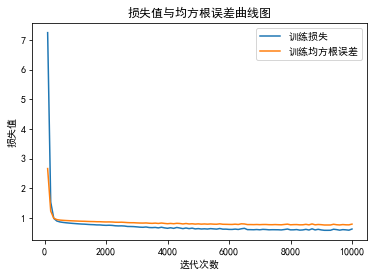

In [478]:
# 绘制训练损失与均方根误差曲线图
plt.plot(train_epochs, train_losses, label='训练损失')
plt.plot(train_epochs, rmse_list, label='训练均方根误差')
plt.xlabel('迭代次数')
plt.ylabel('损失值')
plt.title('损失值与均方根误差曲线图')
plt.legend()
plt.show()

In [480]:
# 模型预测
test_inputs = torch.Tensor(X_test)
predictions = model(test_inputs).squeeze().detach().numpy()

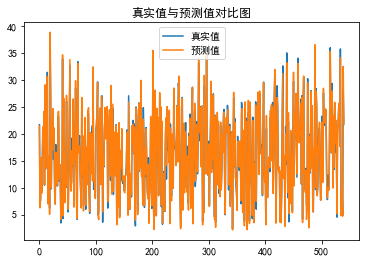

In [481]:
# 可视化分析
plt.plot(y_test.squeeze(), label='真实值')
plt.plot(predictions, label='预测值')
plt.title('真实值与预测值对比图')
plt.legend()
plt.show()

In [482]:
# 去除id列
test1 = covid_test.drop(['id'], axis=1)
test1

,AL,AK,AZ,AR,CA,CO,CT,FL,GA,ID,...,shop.2,restaurant.2,spent_time.2,large_event.2,public_transit.2,anxious.2,depressed.2,felt_isolated.2,worried_become_ill.2,worried_finances.2
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,52.071090,8.624001,29.374792,5.391413,2.754804,19.695098,13.685645,24.747837,66.194950,44.873473
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.742461,21.720187,41.375784,9.450179,3.150088,22.075715,17.302077,23.559622,57.015009,38.372829
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,59.109045,20.123959,40.072556,8.781522,2.888209,23.920870,18.342506,24.993341,55.291498,38.907257
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.442267,16.083529,36.977612,5.199286,2.575347,21.073800,12.087171,18.608723,67.036197,43.142779
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.588783,19.503010,42.631236,11.549771,8.530551,15.896575,11.781634,15.065228,61.196518,43.574676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.762931,21.494159,44.202567,14.996865,2.291745,17.740003,12.822676,18.123344,60.417531,37.156229
889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,57.888461,16.770893,37.373472,7.169675,2.631595,20.587449,15.960166,23.710310,58.758735,38.673787
890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,57.589848,16.761311,36.874822,11.046907,1.912310,16.800220,13.280423,22.423640,60.934851,43.122513
891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,57.966384,22.696669,45.350415,20.343487,2.385330,16.528265,15.092539,17.476063,54.862386,44.016255


In [483]:
test2 = test1.iloc[:,cols]
# 去除MA列
test2 = test2.drop('MA',axis=1)

In [484]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# 创建StandardScaler对象
scaler = StandardScaler()
# 对数据进行标准化处理
test3 = scaler.fit_transform(test2)
test3

array([[ 0.74716257,  0.85033742,  0.8139962 , ...,  0.34630061,
         0.27716307,  0.10036909],
       [-1.35201514, -1.3878019 , -1.65231316, ...,  0.70121533,
        -1.33826122, -1.3119887 ],
       [-1.17315279, -1.2564418 , -1.65761337, ...,  0.46608093,
        -1.64155313, -1.19587641],
       ...,
       [ 0.12098881,  0.08514113,  1.37416519, ..., -0.41015354,
        -0.64847373, -0.28005199],
       [ 0.40290523,  0.35293484,  0.2536118 , ...,  0.0145592 ,
        -1.7170654 , -0.08587364],
       [-0.18426851, -0.18501556,  0.62254318, ..., -0.57223171,
         0.39608821, -1.408013  ]])

In [485]:
# 将测试数据转换为 PyTorch 的张量类型
test4 = torch.tensor(test3, dtype=torch.float32)

In [486]:
model.eval()
test_outputs = model(test4)
predicted_labels = test_outputs.detach().numpy()
predicted_labels

array([[21.509405  ],
       [ 2.549297  ],
       [ 3.1294951 ],
       [11.428817  ],
       [ 0.5180947 ],
       [26.907755  ],
       [25.11659   ],
       [ 7.9527993 ],
       [10.959432  ],
       [11.53081   ],
       [18.285397  ],
       [21.198141  ],
       [22.469755  ],
       [13.4436655 ],
       [22.05615   ],
       [19.14145   ],
       [30.168509  ],
       [ 8.370968  ],
       [22.855482  ],
       [ 0.8156958 ],
       [ 7.25402   ],
       [24.589808  ],
       [18.722025  ],
       [14.130683  ],
       [12.338315  ],
       [28.539892  ],
       [27.347486  ],
       [27.91184   ],
       [ 6.305296  ],
       [19.422388  ],
       [11.087829  ],
       [ 6.6555276 ],
       [27.84881   ],
       [12.778004  ],
       [21.01105   ],
       [32.085922  ],
       [12.451745  ],
       [ 6.731646  ],
       [16.22278   ],
       [ 8.9166765 ],
       [16.23491   ],
       [ 4.790345  ],
       [ 7.6250176 ],
       [18.176565  ],
       [ 6.2268558 ],
       [16

In [488]:
#导入 sampleSubmission 表
sampleSubmission = pd.read_csv(r'C:\Users\Administrator\Desktop\3-COVID-19\sampleSubmission.csv', sep = ',')
# 创建新表
MLP_sampleSubmission = pd.DataFrame()
MLP_sampleSubmission .to_csv(r'C:\Users\Administrator\Desktop\3-COVID-19\MLP_sampleSubmission.csv', index=False)
# 写入id列
MLP_sampleSubmission["id"] =sampleSubmission["id"]

In [489]:
# 将数据写入特定一列
MLP_sampleSubmission['tested_positive'] = predicted_labels[:len(sampleSubmission)]  # 只写入与数据帧行数相匹配的部分数组数据
# 写回 CSV 文件
MLP_sampleSubmission.to_csv(r'C:\Users\Administrator\Desktop\3-COVID-19\MLP_sampleSubmission.csv', index=False)

In [490]:
MLP_sampleSubmission

,id,tested_positive
0,0,21.509405
1,1,2.549297
2,2,3.129495
3,3,11.428817
4,4,0.518095
...,...,...
888,888,14.953588
889,889,4.280154
890,890,31.722933
891,891,25.387228
